In [1]:
#Feature Selection Techniques:-

#When ever data is collected there may be some errors to overcome this we will be selecting features.

import pandas as pd
df=pd.read_csv('E:/datafiles/mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
#1.Univariate Selection Technique
#Selecting the independent[X] and dependent[y] features

X = df.iloc[:,:-1]
y = df['price_range']

In [3]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [4]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [5]:
#SelectKBest is used to select the best feature from the dataset.
#SelectKBest is also called as Information_Gain.
#chi2 is used for applying statistical analysis i.e, 
#Hypothses Testing, Null Hypothesis Testing, Alternative Hypothesis Testing
#Internally it is used to see whether p-value is < 0.5 based on that it will be ordering all the features
#based on the importance.


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
#To see how many features are there in dataset

df.shape

(2000, 21)

In [7]:
#Apply SelectKBest Algorithm

ordered_rank_features = SelectKBest(score_func = chi2,k = 20)
ordered_feature = ordered_rank_features.fit(X,y)

In [8]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000002211262F280>)

In [9]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [10]:
#Now we will order the features scores into a dataframe with column "Score" into x.columns dataframe.

dfscores = pd.DataFrame(ordered_feature.scores_,columns = ["Score"])
dfcolumns = pd.DataFrame(X.columns)

In [11]:
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [12]:
#Now we can concatenate the 'Score' with the pandas dataframe

features_rank = pd.concat([dfcolumns,dfscores],axis = 1)
features_rank

,0,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [13]:
#Creating columns 'Features','Score' in dataframe

features_rank.columns = ['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [14]:
#To get the top ten features from the above dataset based on Univariate selection.

features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [15]:
#2.ExtraTreesClassifier
#Feature Importance Technique
#This technique gives you a score for each feature of your data,the higher the score more relevant it is

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [16]:
print(model.feature_importances_)

[0.06232966 0.01948659 0.03297773 0.01945806 0.03142284 0.01665631
 0.03502151 0.0326518  0.03506887 0.03275984 0.03281607 0.04625733
 0.04861642 0.40157988 0.03376013 0.03355155 0.033188   0.01458025
 0.01781406 0.02000311]


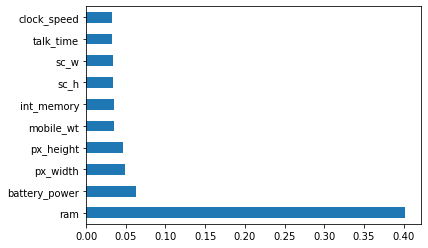

In [17]:
ranked_features = pd.Series(model.feature_importances_ , index = X.columns)
ranked_features.nlargest(10).plot(kind = 'barh')
plt.show()

In [18]:
#Correlation:-
#If your independent features and dependent features are increasing gradually this is positive correlation.
#If your independent features and dependent features are decreasing gradually this is negative correlation.
#If your independent features increasing & dependent features are decreasing this is inverse correlation.

df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


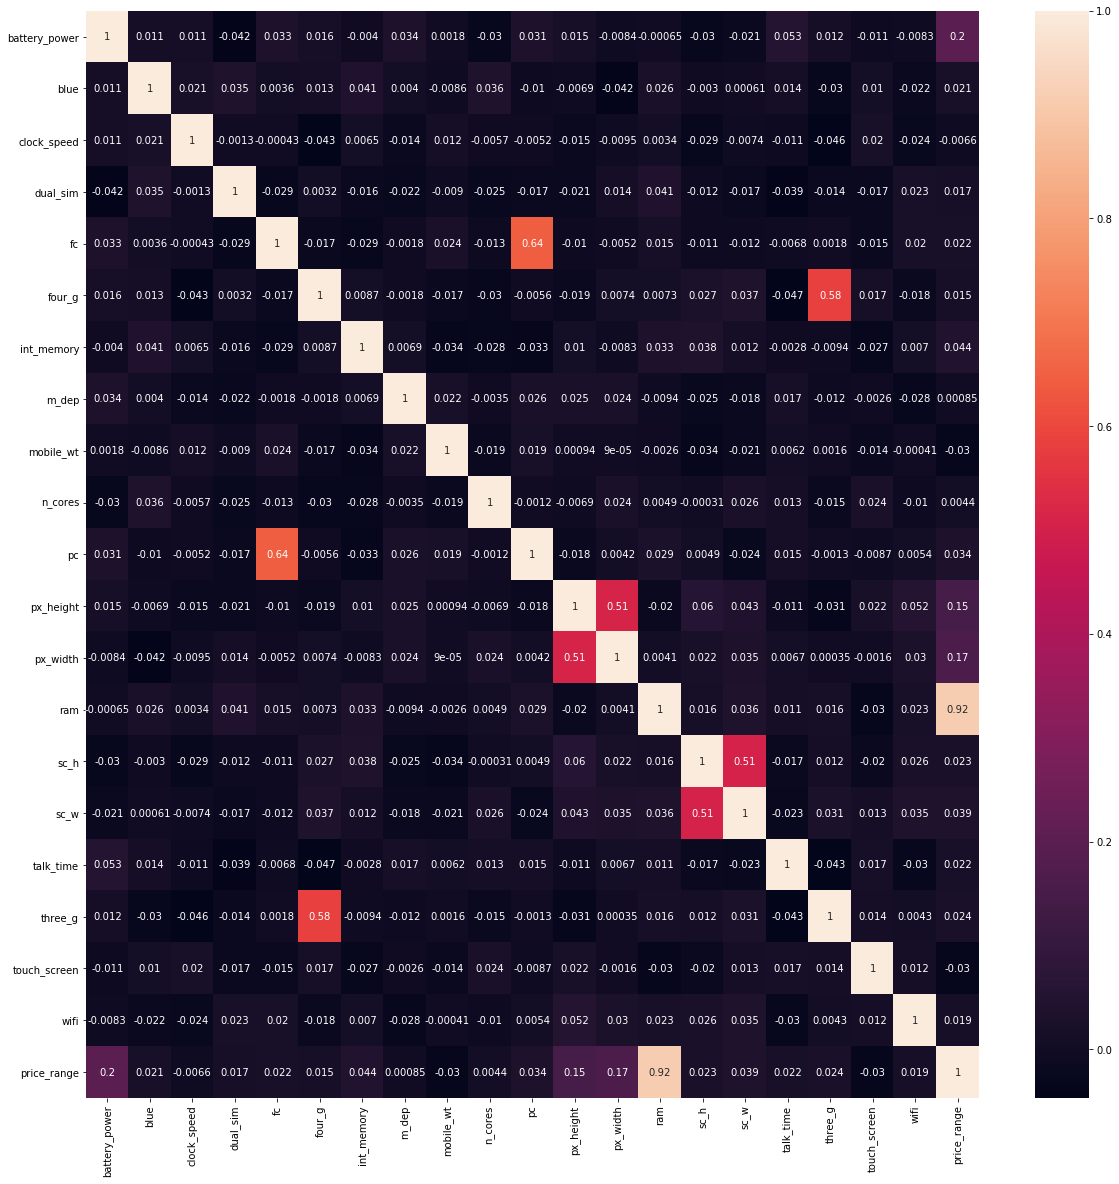

In [19]:
import seaborn as sns
corr = df.corr()
top_features = corr.index
plt.figure(figsize = (20,20))
sns.heatmap(df[top_features].corr(),annot = True)

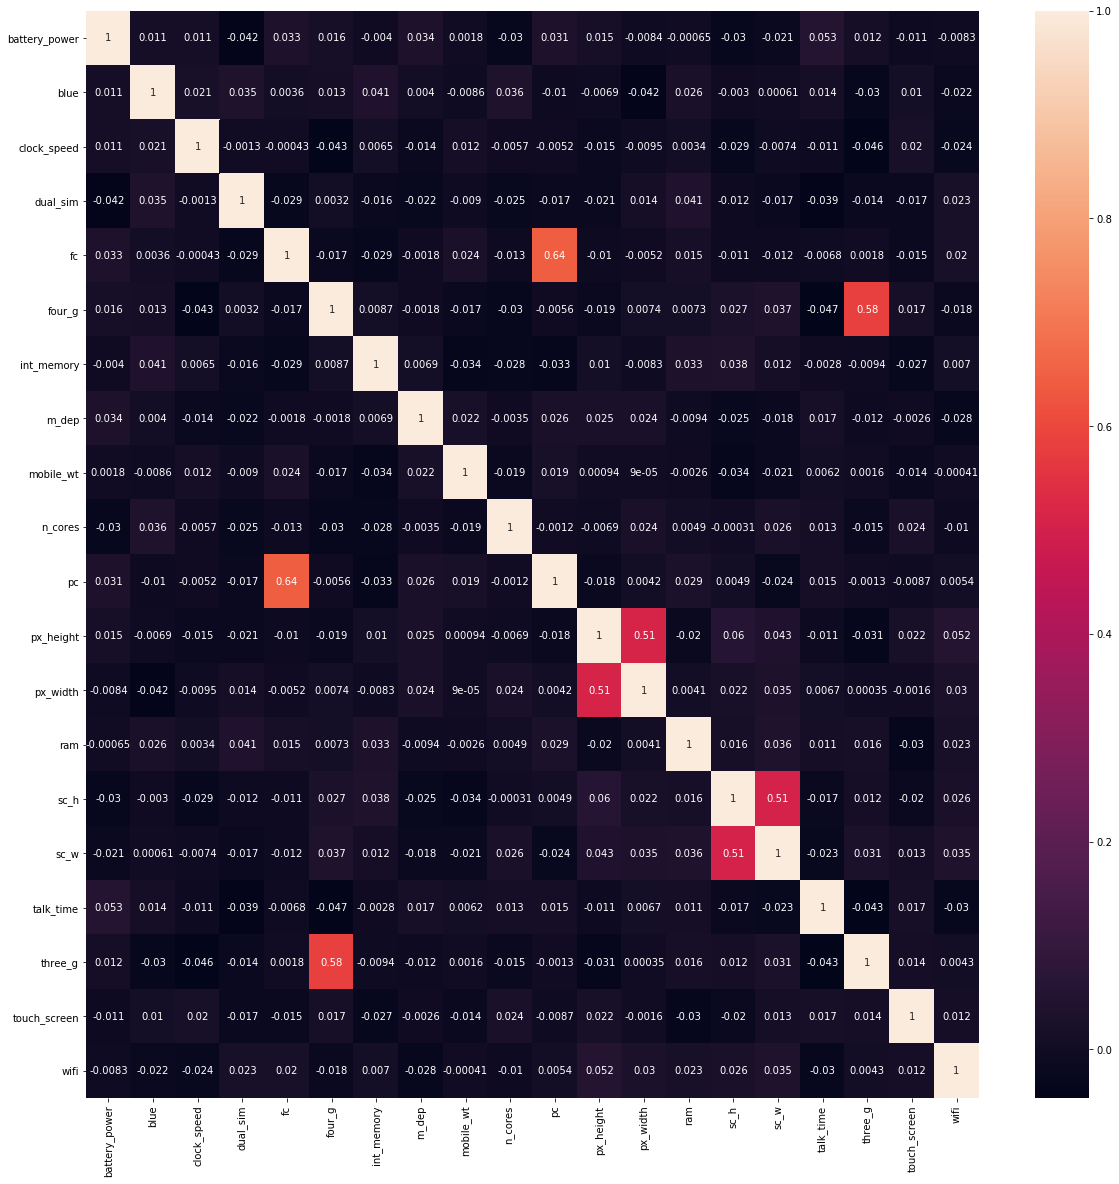

In [20]:
#Remove The correlated:-
#Now we are removing the highly correlated faetures
#The correlated features should not be removed with respect to the dependent features.
#We remove only the correlated features that are present in dataset w.r.t independent features.
#The reason why we are skipping the last feature 'Price_range' bcz it is our depenedent faeture.
#When two independent faetures are highly corrrelated we can drop one of those features.

import seaborn as sns
corr = df.iloc[:,:-1].corr()
top_features = corr.index
plt.figure(figsize = (20,20))
sns.heatmap(df[top_features].corr(),annot = True)

In [21]:
#When corrrelated threshold is more than 80% i.e, 0.8 we can drop one of those features.

threshold = 0.5

In [22]:
#Find and remove correlated features.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
correlation(df.iloc[:,:-1], threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [24]:
#mutual_info_classif:- This library is used to find out highly corrrelated features
#This technique is called as Information_Gain

from sklearn.feature_selection import mutual_info_classif

In [25]:
#This is used to classify the highly correlated non gegative faetures from dataset.

mutual_info = mutual_info_classif(X,y)

In [26]:
#Conerting this into dataframe and arranging them into an ascending order.

mutual_data = pd.Series(mutual_info,index = X.columns)
mutual_data.sort_values(ascending = False)

ram              0.846104
px_width         0.030465
battery_power    0.029085
px_height        0.027987
three_g          0.024523
sc_h             0.016133
int_memory       0.012780
mobile_wt        0.009865
sc_w             0.008417
four_g           0.008202
fc               0.004021
blue             0.000000
clock_speed      0.000000
dual_sim         0.000000
wifi             0.000000
m_dep            0.000000
touch_screen     0.000000
pc               0.000000
talk_time        0.000000
n_cores          0.000000
dtype: float64